In [3]:
import matplotlib.pyplot as plt
import itertools
import csv

In [4]:
# Define the list of numbers
colors = [1, 2, 3, 4]

# Generate all permutations of the numbers
permutations = set(itertools.permutations(colors))

possible_patterns = {color: permutations for color in colors}

# Sudoku loading

In [101]:
preset_grid =  [
    [0, 0, 0, 7, 5, 0, 4, 9, 0],
    [0, 4, 5, 6, 9, 0, 0, 1, 8],
    [0, 0, 6, 0, 0, 0, 7, 0, 0],
    [9, 8, 0, 2, 0, 0, 0, 0, 0],
    [2, 0, 7, 1, 0, 8, 0, 0, 0],
    [0, 0, 3, 0, 0, 5, 8, 0, 7],
    [4, 2, 0, 0, 6, 7, 1, 8, 0],
    [5, 0, 0, 0, 2, 0, 0, 7, 4],
    [3, 0, 0, 5, 1, 0, 9, 0, 2]
]

with open('./sudokus/easy5.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(preset_grid)



# ***Pre-Processing***

In [102]:
def csv_to_preset_tuples(filename):
    preset_tuples = {}
    with open(filename, newline='') as file:
        reader = csv.reader(file)
        counter = 0
        for i, row in enumerate(reader):
            counter += 1
            for j, value in enumerate(row):
                if value != "0":
                    preset_tuples[(i, j)] = {int(value)}
        print(counter)
    return preset_tuples

preset_tuples = csv_to_preset_tuples("./sudokus/easy5.csv")

rows_constrictions = {}
columns_constrictions = {}
subunit_constrictions = {}

9


In [103]:
def update_constrictions(fixed_tuples: dict[tuple : int], sudoku_size : int) -> None:
    
    for row in range(sudoku_size):
        for column in range(sudoku_size):        
            if (row, column) in fixed_tuples:
                subunit = (int(row//sudoku_size**0.5), int(column//sudoku_size**0.5))

                if row in rows_constrictions:
                    rows_constrictions[row].update(fixed_tuples[(row, column)])
                else:
                    rows_constrictions[row] = fixed_tuples[(row, column)].copy()
                    
                if column in columns_constrictions:
                    columns_constrictions[column].update(fixed_tuples[(row, column)])
                else:
                    columns_constrictions[column] = fixed_tuples[(row, column)].copy()

                if subunit in subunit_constrictions:
                    subunit_constrictions[subunit].update(fixed_tuples[(row, column)])
                else: 
                    subunit_constrictions[subunit] = fixed_tuples[(row, column)].copy()


def find_invalid_values(row: int, column: int, sudoku_size : int) -> set:

    subunit = (int(row//sudoku_size**0.5), int(column//sudoku_size**0.5))
    invalid_values = set()
    if row in rows_constrictions:
        invalid_values = invalid_values | rows_constrictions[row]
    if column in columns_constrictions:
        invalid_values = invalid_values | columns_constrictions[column]
    if subunit in subunit_constrictions:
        invalid_values = invalid_values | subunit_constrictions[subunit]

    return invalid_values


def plot_sudoku_grid(cell_values: dict[tuple: int], sudoku_size=4) -> None:

    fig, ax = plt.subplots(figsize=(6, 6))
    
    ax.set_xlim(0, sudoku_size)
    ax.set_ylim(0, sudoku_size)
    
    minor_ticks = range(0, sudoku_size + 1)
    major_ticks = range(0, sudoku_size + 1, int(sudoku_size**0.5))
    
    for tick in minor_ticks:
        ax.plot([tick, tick], [0, sudoku_size], 'k', linewidth=0.5)
        ax.plot([0, sudoku_size], [tick, tick], 'k', linewidth=0.5)
    
    for tick in major_ticks:
        ax.plot([tick, tick], [0, sudoku_size], 'k', linewidth=3)
        ax.plot([0, sudoku_size], [tick, tick], 'k', linewidth=3)
        
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add numbers to the grid from the dictionary
    for (i, j), value in cell_values.items():
        ax.text(j + 0.5, sudoku_size -0.5 - i, str(next(iter(value))),
                ha='center', va='center', fontsize=100/sudoku_size)

    #plt.gca().invert_yaxis()
    plt.show()

def general_preprocessing(sudoku_size=4) -> dict[tuple: set]:
    
    update_constrictions(fixed_tuples=preset_tuples, sudoku_size=sudoku_size)
    plot_sudoku_grid(cell_values=preset_tuples, sudoku_size=sudoku_size)

    open_tuples = {}
    possible_values = set(range(1, sudoku_size + 1))

    for row in range(sudoku_size):
        for column in range(sudoku_size):
            if (row, column) not in preset_tuples:
    
                invalid_values = find_invalid_values(row=row, column=column,
                                                      sudoku_size=sudoku_size)
                open_tuples[(row, column)] = possible_values - invalid_values
    
    fixed_tuples = {key: value for key, value in open_tuples.items() if len(value) == 1}
    preset_tuples.update(fixed_tuples)

    return open_tuples

In [106]:
columns_constrictions

{3: {1, 2, 5, 6, 7},
 4: {1, 2, 5, 6, 9},
 6: {1, 4, 7, 8, 9},
 7: {1, 7, 8, 9},
 1: {2, 4, 8},
 2: {3, 5, 6, 7},
 8: {2, 4, 7, 8},
 0: {2, 3, 4, 5, 9},
 5: {5, 7, 8}}

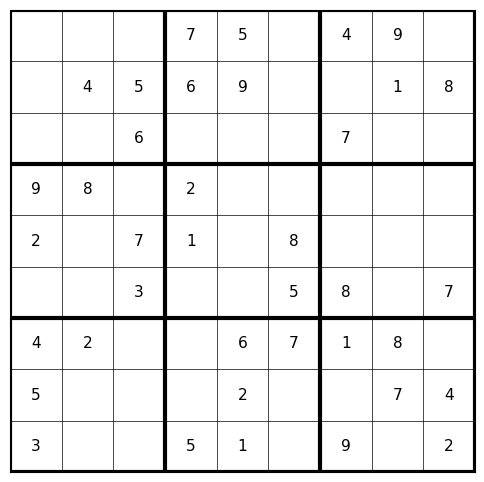

Open tuples length is: 43


{(0, 0): {1, 8},
 (0, 1): {1, 3},
 (0, 2): {1, 2, 8},
 (0, 5): {1, 2, 3},
 (0, 8): {3, 6},
 (1, 0): {7},
 (1, 5): {2, 3},
 (1, 6): {2, 3},
 (2, 0): {1, 8},
 (2, 1): {1, 3, 9},
 (2, 3): {3, 4, 8},
 (2, 4): {3, 4, 8},
 (2, 5): {1, 2, 3, 4},
 (2, 7): {2, 3, 5},
 (2, 8): {3, 5},
 (3, 2): {1, 4},
 (3, 4): {3, 4, 7},
 (3, 5): {3, 4, 6},
 (3, 6): {3, 5, 6},
 (3, 7): {3, 4, 5, 6},
 (3, 8): {1, 3, 5, 6},
 (4, 1): {5, 6},
 (4, 4): {3, 4},
 (4, 6): {3, 5, 6},
 (4, 7): {3, 4, 5, 6},
 (4, 8): {3, 5, 6, 9},
 (5, 0): {1, 6},
 (5, 1): {1, 6},
 (5, 3): {4, 9},
 (5, 4): {4},
 (5, 7): {2, 4, 6},
 (6, 2): {9},
 (6, 3): {3, 9},
 (6, 8): {3, 5},
 (7, 1): {1, 6, 9},
 (7, 2): {1, 8, 9},
 (7, 3): {3, 8, 9},
 (7, 5): {3, 9},
 (7, 6): {3, 6},
 (8, 1): {6, 7},
 (8, 2): {8},
 (8, 5): {4},
 (8, 7): {6}}

In [105]:
open_tuples = general_preprocessing(sudoku_size=9)
print(f"Open tuples length is: {len(open_tuples)}")
open_tuples

# ***Exact Covering***

In [84]:
total_tuples = {**preset_tuples, **open_tuples}
total_tuples


{(0, 0): {5},
 (0, 2): {8},
 (0, 4): {1},
 (0, 6): {4},
 (0, 8): {7},
 (1, 0): {3},
 (1, 1): {4},
 (1, 6): {9},
 (2, 0): {1},
 (3, 1): {7},
 (3, 2): {3},
 (3, 4): {9},
 (3, 5): {1},
 (3, 6): {2},
 (3, 7): {5},
 (4, 0): {8},
 (4, 2): {1},
 (4, 3): {7},
 (4, 5): {6},
 (4, 7): {4},
 (5, 0): {9},
 (5, 1): {2},
 (5, 5): {5},
 (5, 7): {7},
 (5, 8): {1},
 (6, 1): {8},
 (6, 2): {5},
 (6, 3): {4},
 (7, 1): {1},
 (7, 2): {9},
 (7, 3): {5},
 (7, 6): {7},
 (8, 0): {7},
 (8, 1): {3},
 (8, 2): {4},
 (8, 6): {5},
 (8, 7): {9},
 (8, 8): {8},
 (3, 3): {8},
 (3, 8): {6},
 (4, 1): {5},
 (4, 6): {3},
 (5, 2): {6},
 (8, 5): {2},
 (3, 0): {4},
 (4, 4): {2},
 (4, 8): {9},
 (5, 3): {3},
 (5, 6): {8},
 (8, 4): {6},
 (2, 6): {6},
 (5, 4): {4},
 (8, 3): {1},
 (2, 1): {9},
 (6, 6): {1},
 (0, 1): {6},
 (2, 3): {2},
 (0, 3): {9},
 (1, 3): {6},
 (2, 2): {7},
 (0, 5): {3},
 (1, 2): {2},
 (0, 7): {2, 3},
 (1, 4): {5, 7, 8},
 (1, 5): {7, 8},
 (1, 7): {1, 2, 8},
 (1, 8): {2, 5},
 (2, 4): {3, 5, 8},
 (2, 5): {3, 4, 8},
 

In [85]:
def create_patterns(total_tuples: dict[tuple: set], sudoku_size:int) -> dict[int: list]:
    
    patterns = {i: [[]] for i in range(1, sudoku_size+1)}

    for column in range(sudoku_size):
        
        for color in range(1, sudoku_size+1):
            color_patterns = []
            for cell in total_tuples:
                if cell[-1] == column:
                    
                    if color in total_tuples[cell]:
                        
                        for pattern in patterns[color]:
                            if cell[0] not in pattern:
                                new_pattern = pattern.copy()
                                new_pattern.append(cell[0])
                                color_patterns.append(new_pattern)

            patterns[color] = color_patterns
    
    return patterns


patterns = create_patterns(total_tuples=total_tuples, sudoku_size=9)
patterns

{1: [[2, 7, 4, 8, 0, 3, 6, 1, 5]],
 2: [[7, 5, 1, 2, 4, 8, 3, 0, 6], [6, 5, 1, 2, 4, 8, 3, 0, 7]],
 3: [[1, 8, 3, 5, 7, 6, 4, 0, 2],
  [1, 8, 3, 5, 6, 7, 4, 0, 2],
  [1, 8, 3, 5, 7, 0, 4, 6, 2],
  [1, 8, 3, 5, 6, 0, 4, 7, 2],
  [1, 8, 3, 5, 7, 2, 4, 0, 6],
  [1, 8, 3, 5, 2, 7, 4, 0, 6],
  [1, 8, 3, 5, 7, 0, 4, 2, 6],
  [1, 8, 3, 5, 2, 0, 4, 7, 6],
  [1, 8, 3, 5, 6, 2, 4, 0, 7],
  [1, 8, 3, 5, 2, 6, 4, 0, 7],
  [1, 8, 3, 5, 6, 0, 4, 2, 7],
  [1, 8, 3, 5, 2, 0, 4, 6, 7]],
 4: [[3, 1, 8, 6, 5, 2, 0, 4, 7]],
 5: [[0, 4, 6, 7, 2, 5, 8, 3, 1], [0, 4, 6, 7, 1, 5, 8, 3, 2]],
 6: [[7, 0, 5, 1, 8, 4, 2, 6, 3], [6, 0, 5, 1, 8, 4, 2, 7, 3]],
 7: [[8, 3, 2, 4, 6, 1, 7, 5, 0], [8, 3, 2, 4, 1, 6, 7, 5, 0]],
 8: [[4, 6, 0, 3, 7, 2, 5, 1, 8],
  [4, 6, 0, 3, 2, 7, 5, 1, 8],
  [4, 6, 0, 3, 7, 1, 5, 2, 8],
  [4, 6, 0, 3, 1, 7, 5, 2, 8]],
 9: [[5, 2, 7, 0, 3, 6, 1, 8, 4]]}

# ***Reducing qubits in Grover's Algorithm***